<a href="https://colab.research.google.com/github/dheerajkumar1a1a/Kaggle_github/blob/main/tomato_Chennai_prophet_multiv_rain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

In [ ]:
zip_ref = zipfile.ZipFile("multi_chennai.zip", 'r')
zip_ref.extractall("/content/")
zip_ref.close()

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cufflinks as cf
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default='plotly_white'
import os
import plotly.io as pio
pio.renderers.default = 'colab'
import seaborn as sns
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
parent_df={}
parent_df['RANCHI']=pd.read_csv('complete_data.csv',index_col=0,parse_dates=[0])

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
# sns.lineplot(data=parent_df['RANCHI'])

parent_df['RANCHI'].iplot()

In [ ]:
px.line(parent_df['RANCHI'],x=parent_df['RANCHI'].index,y=['Retail Prices','Arrival Quantity'])

In [ ]:
df_Ranchi=parent_df['RANCHI'].copy()

In [ ]:
df_Ranchi['2011':'2012'].describe()

Arrival Quantity  Retail Prices    Min Price     Max Price  Modal Price
count        569.000000     569.000000   569.000000    569.000000   569.000000
mean         368.732865    1670.826011   985.992970   1146.066784  1051.173989
std          131.423299     995.549703   529.260326    790.187649   546.189524
min           36.000000       0.000000   200.000000    300.000000   237.000000
25%          330.000000    1000.000000   600.000000    700.000000   650.000000
50%          360.000000    1600.000000   900.000000   1000.000000   950.000000
75%          400.000000    2000.000000  1200.000000   1400.000000  1300.000000
max         3200.000000   14000.000000  3000.000000  14000.000000  3200.000000

In [ ]:
df_Ranchi['2011':'2014']['Retail Prices'].iplot()

In [ ]:
df_Ranchi_1=df_Ranchi.copy()
df_Ranchi.isnull().sum()

Arrival Quantity    2412
Retail Prices       2412
Min Price           2412
Max Price           2412
Modal Price         2412
dtype: int64

In [ ]:
# https://www.ceicdata.com/en/india/retail-price-department-of-agriculture-and-cooperation-food-by-cities-tomato/retail-price-doac-tomato-jharkhand-ranchi
# above is the source provided to prove that 18k price is an outlier

df_Ranchi_1=df_Ranchi_1[df_Ranchi_1['Retail Prices']<10000]
df_Ranchi_1.isnull().sum()
# df_Ranchi['Retail Prices'].iplot()

Arrival Quantity    0
Retail Prices       0
Min Price           0
Max Price           0
Modal Price         0
dtype: int64

In [ ]:
df_Ranchi=df_Ranchi['2010':'2020'].copy()


In [ ]:
df_Ranchi_1=df_Ranchi_1['2010':'2020'].copy()
df_Ranchi_1.isnull().sum()

Arrival Quantity    0
Retail Prices       0
Min Price           0
Max Price           0
Modal Price         0
dtype: int64

In [ ]:
df_Ranchi_dropped=df_Ranchi_1.dropna()

In [ ]:
df_Ranchi_dropped['Arrival Quantity']['2020'].iplot()

In [ ]:
df_Ranchi_dropped.iplot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

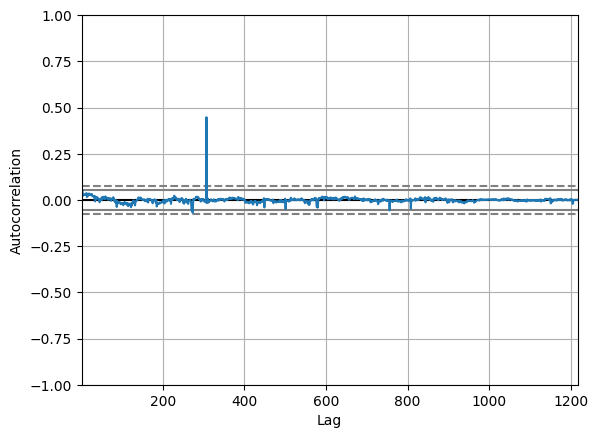

In [ ]:
pd.plotting.autocorrelation_plot(df_Ranchi_dropped['2016':'2020']['Arrival Quantity'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

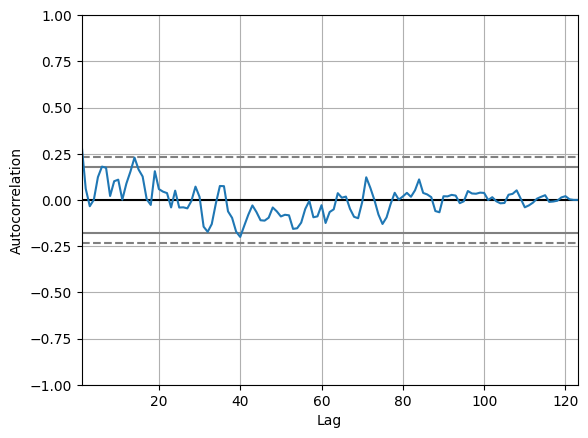

In [ ]:
pd.plotting.autocorrelation_plot(df_Ranchi_dropped['2010':'2020']['Arrival Quantity'].resample('1m').mean())

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

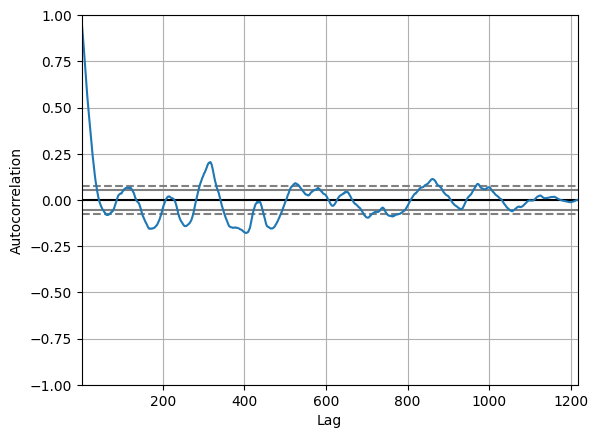

In [ ]:
pd.plotting.autocorrelation_plot(df_Ranchi_dropped['2016':'2020']['Retail Prices'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

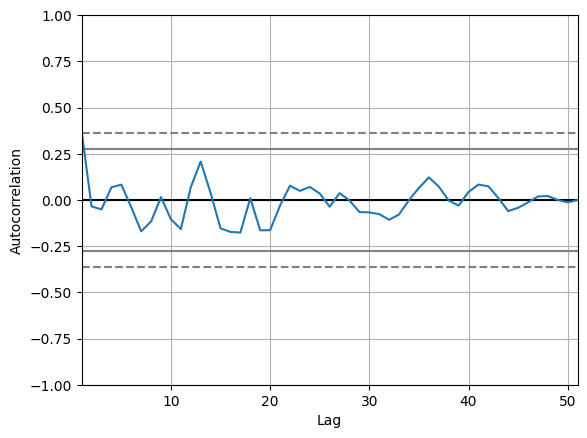

In [ ]:
pd.plotting.autocorrelation_plot(df_Ranchi_dropped['2016':'2020']['Retail Prices'].resample('1m').mean())

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

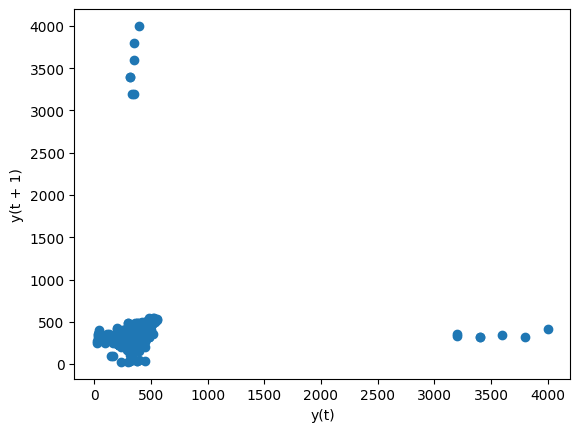

In [ ]:
pd.plotting.lag_plot(df_Ranchi_1['Arrival Quantity'],lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

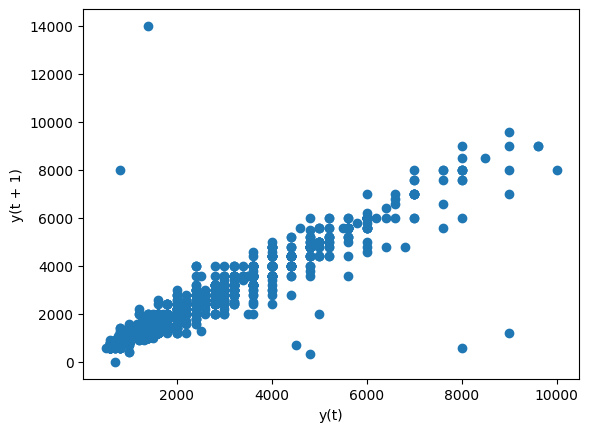

In [ ]:
pd.plotting.lag_plot(df_Ranchi['Retail Prices'],lag=1)

In [ ]:
from statsmodels.tsa.stattools import adfuller


# In[19]:


test_result=adfuller(df_Ranchi_dropped['Arrival Quantity'])


# In[20]:


#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(df_Ranchi_dropped['Arrival Quantity'])

ADF Test Statistic : -11.73576579884268
p-value : 1.3089289471527764e-21
#Lags Used : 12
Number of Observations Used : 2930
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
adfuller_test(df_Ranchi_dropped['Retail Prices'])

ADF Test Statistic : -6.956374763304142
p-value : 9.405989382784585e-10
#Lags Used : 9
Number of Observations Used : 2933
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
df_Ranchi.isnull().sum()

Arrival Quantity    868
Retail Prices       868
Min Price           868
Max Price           868
Modal Price         868
dtype: int64

In [ ]:
df_Ranchi_imp=pd.DataFrame()
df_Ranchi_imp['Retail Prices']=df_Ranchi['Retail Prices'].rolling(window=5,min_periods=2).mean().fillna(method='ffill')
df_Ranchi_imp['Arrival Quantity']=df_Ranchi['Arrival Quantity'].rolling(window=5,min_periods=2).mean().fillna(method='ffill')
df_Ranchi_imp['Retail Prices_lag']=df_Ranchi['Retail Prices'].rolling(window=5,min_periods=2).mean().fillna(method='ffill').shift(3)
# df_Ranchi_imp['Arrival Quantity']=df_Ranchi['Arrival Quantity'].rolling(window=5,min_periods=2).mean().fillna(method='bfill')
df_Ranchi_imp=df_Ranchi_imp.dropna()
#df_Ranchi_imp['2008':'2016']['Retail Prices'].plot()
df_Ranchi_imp[['Retail Prices','Retail Prices_lag']].iplot()
df_Ranchi_imp.isnull().sum()

Retail Prices        0
Arrival Quantity     0
Retail Prices_lag    0
dtype: int64

In [ ]:
df_Ranchi_imp_month=pd.DataFrame()
df_Ranchi_imp_month['Retail Prices_lag']=df_Ranchi_imp['Retail Prices_lag'].resample('M').mean()
df_Ranchi_imp_month['Arrival Quantity']=df_Ranchi_imp['Arrival Quantity'].resample('M').max()
df_Ranchi_imp_month['Arrival Quantity_mean']=df_Ranchi_imp['Arrival Quantity'].resample('M').sum()
df_Ranchi_imp_month=df_Ranchi_imp_month.dropna()
df_Ranchi_imp_month.index = df_Ranchi_imp_month.index + pd.offsets.MonthBegin(0)
df_Ranchi_imp_month[['Arrival Quantity','Retail Prices_lag']].tail(6)

Arrival Quantity  Retail Prices_lag
Date                                           
2019-11-01        376.666667        3694.623656
2019-12-01        382.500000        3356.559140
2020-01-01        395.000000        2777.580645
2020-02-01        426.000000        2435.806452
2020-03-01        420.000000        1823.763441
2020-04-01        420.000000        1580.215054

In [ ]:
df_1_new=pd.read_csv('Fert_chennai_dies_price.csv',index_col=[0],parse_dates=True)
df_1_new

N       P       K      S  thousand million barrels  \
2002-06-01  23.227  26.276  24.487  1.784                       5.8   
2002-10-01  23.227  26.276  24.487  1.784                       5.8   
2002-12-01  23.227  26.276  24.487  1.784                       5.8   
2003-03-01  23.227  26.276  24.487  1.784                       5.8   
2003-04-01  23.227  26.276  24.487  1.784                       5.8   
...            ...     ...     ...    ...                       ...   
2021-10-01  18.901  15.216  11.124  3.562                       4.7   
2022-02-01  18.901  15.216  11.124  3.562                       4.7   
2022-03-01  18.901  15.216  11.124  3.562                       4.7   
2022-04-01  18.901  15.216  11.124  3.562                       4.7   
2023-03-01  18.901  15.216  11.124  3.562                       4.7   

                dprice  
2002-06-01   19.969788  
2002-10-01   21.631415  
2002-12-01   19.063444  
2003-03-01   24.048338  
2003-04-01   21.329305  
...                ...  
2021-10-01   91.268885  
2022-02-01   91.722057  
2022-03-01  100.785501  
2022-04-01   97.688823  
2023-03-01   94.592145  

[79 rows x 6 columns]

In [ ]:
#df_1_new=pd.read_csv('FERTILIZERS.csv',names=['Date','N','P','K','S'],header=0,index_col=[0],parse_dates=True)
finaldf1=df_Ranchi_imp_month[['Arrival Quantity_mean','Retail Prices_lag']].copy()
finaldf1

Arrival Quantity_mean  Retail Prices_lag
Date                                                
2010-02-01           10271.666667        1807.283951
2010-03-01           17327.000000         967.419355
2010-04-01           12711.500000         797.956989
2010-05-01           11286.000000        1211.827957
2010-06-01            9513.166667        2424.892473
...                           ...                ...
2019-12-01           11439.500000        3356.559140
2020-01-01           11268.166667        2777.580645
2020-02-01           11961.333333        2435.806452
2020-03-01           12327.833333        1823.763441
2020-04-01           11192.000000        1580.215054

[123 rows x 2 columns]

In [ ]:
finaldf1=df_Ranchi_imp_month[['Arrival Quantity_mean','Retail Prices_lag']].copy()
df_concat_1 = pd.concat([finaldf1, df_1_new], axis=1, join='outer')
df_concat_1.loc[:,['N','P','K','S','thousand million barrels','dprice']]=df_concat_1.loc[:,['N','P','K','S','thousand million barrels','dprice']].interpolate().fillna(method='bfill')
df_concat_1.dropna(subset=['Arrival Quantity_mean','Retail Prices_lag'],inplace=True)
df_concat_1.head()

Arrival Quantity_mean  Retail Prices_lag       N       P       K  \
2010-02-01           10271.666667        1807.283951  23.227  26.276  24.487   
2010-03-01           17327.000000         967.419355  23.227  26.276  24.487   
2010-04-01           12711.500000         797.956989  23.227  26.276  24.487   
2010-05-01           11286.000000        1211.827957  23.227  26.113  24.362   
2010-06-01            9513.166667        2424.892473  23.227  25.950  24.237   

                S  thousand million barrels     dprice  
2010-02-01  1.784                    5.7875  37.133685  
2010-03-01  1.784                    5.7750  38.096676  
2010-04-01  1.784                    5.7500  39.456193  
2010-05-01  1.784                    5.7375  40.135951  
2010-06-01  1.784                    5.7250  40.815709

In [ ]:
df_concat_1['NBS rate']=3*df_concat_1['N']+1.5*df_concat_1['P']+df_concat_1['K']
df_concat_1=df_concat_1.loc[:,['Arrival Quantity_mean','Retail Prices_lag','NBS rate','thousand million barrels','dprice']]
df_concat_1

Arrival Quantity_mean  Retail Prices_lag  NBS rate  \
2010-02-01           10271.666667        1807.283951  133.5820   
2010-03-01           17327.000000         967.419355  133.5820   
2010-04-01           12711.500000         797.956989  133.5820   
2010-05-01           11286.000000        1211.827957  133.2125   
2010-06-01            9513.166667        2424.892473  132.8430   
...                           ...                ...       ...   
2019-12-01           11439.500000        3356.559140   90.6510   
2020-01-01           11268.166667        2777.580645   90.6510   
2020-02-01           11961.333333        2435.806452   90.6510   
2020-03-01           12327.833333        1823.763441   90.6510   
2020-04-01           11192.000000        1580.215054   90.6510   

            thousand million barrels     dprice  
2010-02-01                    5.7875  37.133685  
2010-03-01                    5.7750  38.096676  
2010-04-01                    5.7500  39.456193  
2010-05-01                    5.7375  40.135951  
2010-06-01                    5.7250  40.815709  
...                              ...        ...  
2019-12-01                    4.7000  73.293052  
2020-01-01                    4.7000  70.775428  
2020-02-01                    4.7000  68.257804  
2020-03-01                    4.7000  65.740180  
2020-04-01                    4.7000  67.326283  

[123 rows x 5 columns]

In [ ]:
df_rain=pd.read_csv('Rainfall_ponneri.csv',index_col=[0],parse_dates=True)
df_rain_m=df_rain.resample('MS').sum()
df_rain_m=df_rain_m.loc[df_concat_1.index,:]
df_rain_m

Rainfall
2010-02-01       0.1
2010-03-01       0.0
2010-04-01       0.0
2010-05-01     123.5
2010-06-01     123.3
...              ...
2019-12-01     208.6
2020-01-01      44.9
2020-02-01       0.2
2020-03-01       0.0
2020-04-01       0.0

[123 rows x 1 columns]

In [ ]:
df_concat_1=pd.concat([df_concat_1,df_rain_m],axis=1)
df_concat_1

Arrival Quantity_mean  Retail Prices_lag  NBS rate  \
2010-02-01           10271.666667        1807.283951  133.5820   
2010-03-01           17327.000000         967.419355  133.5820   
2010-04-01           12711.500000         797.956989  133.5820   
2010-05-01           11286.000000        1211.827957  133.2125   
2010-06-01            9513.166667        2424.892473  132.8430   
...                           ...                ...       ...   
2019-12-01           11439.500000        3356.559140   90.6510   
2020-01-01           11268.166667        2777.580645   90.6510   
2020-02-01           11961.333333        2435.806452   90.6510   
2020-03-01           12327.833333        1823.763441   90.6510   
2020-04-01           11192.000000        1580.215054   90.6510   

            thousand million barrels     dprice  Rainfall  
2010-02-01                    5.7875  37.133685       0.1  
2010-03-01                    5.7750  38.096676       0.0  
2010-04-01                    5.7500  39.456193       0.0  
2010-05-01                    5.7375  40.135951     123.5  
2010-06-01                    5.7250  40.815709     123.3  
...                              ...        ...       ...  
2019-12-01                    4.7000  73.293052     208.6  
2020-01-01                    4.7000  70.775428      44.9  
2020-02-01                    4.7000  68.257804       0.2  
2020-03-01                    4.7000  65.740180       0.0  
2020-04-01                    4.7000  67.326283       0.0  

[123 rows x 6 columns]

In [ ]:
df_new=pd.read_csv('gdp and cpi merged.csv',index_col=0,parse_dates=True)
finaldf1=df_concat_1.merge(df_new,on=df_concat_1.index)
finaldf1=finaldf1.iloc[:-2,:]



In [ ]:
finaldf1

key_0  Arrival Quantity_mean  Retail Prices_lag  NBS rate  \
0   2010-02-01           10271.666667        1807.283951  133.5820   
1   2010-03-01           17327.000000         967.419355  133.5820   
2   2010-04-01           12711.500000         797.956989  133.5820   
3   2010-05-01           11286.000000        1211.827957  133.2125   
4   2010-06-01            9513.166667        2424.892473  132.8430   
..         ...                    ...                ...       ...   
116 2019-10-01           12849.833333        1870.537634   90.6510   
117 2019-11-01           11244.000000        3694.623656   90.6510   
118 2019-12-01           11439.500000        3356.559140   90.6510   
119 2020-01-01           11268.166667        2777.580645   90.6510   
120 2020-02-01           11961.333333        2435.806452   90.6510   

     thousand million barrels     dprice  Rainfall         CPI        GDP  
0                      5.7875  37.133685       0.1   65.030284   99.41989  
1                      5.7750  38.096676       0.0   65.030284   99.62147  
2                      5.7500  39.456193       0.0   65.030284   99.81792  
3                      5.7375  40.135951     123.5   65.795346  100.00665  
4                      5.7250  40.815709     123.3   66.560408  100.18442  
..                        ...        ...       ...         ...        ...  
116                    4.7000  72.084593     369.7  124.322601  100.27402  
117                    4.7000  72.688823      97.8  125.470194  100.08812  
118                    4.7000  73.293052     208.6  126.235257   99.88208  
119                    4.7000  70.775428      44.9  126.235257   99.65701  
120                    4.7000  68.257804       0.2  125.470194   99.41502  

[121 rows x 9 columns]

In [ ]:
finaldf1['ds'] = pd.to_datetime(finaldf1.key_0)
finaldf1.drop('key_0',axis=1,inplace=True)
finaldf1
finaldf1.rename(columns={'Retail Prices_lag':'y'},inplace=True)
finaldf1.tail()

Arrival Quantity_mean            y  NBS rate  thousand million barrels  \
116           12849.833333  1870.537634    90.651                       4.7   
117           11244.000000  3694.623656    90.651                       4.7   
118           11439.500000  3356.559140    90.651                       4.7   
119           11268.166667  2777.580645    90.651                       4.7   
120           11961.333333  2435.806452    90.651                       4.7   

        dprice  Rainfall         CPI        GDP         ds  
116  72.084593     369.7  124.322601  100.27402 2019-10-01  
117  72.688823      97.8  125.470194  100.08812 2019-11-01  
118  73.293052     208.6  126.235257   99.88208 2019-12-01  
119  70.775428      44.9  126.235257   99.65701 2020-01-01  
120  68.257804       0.2  125.470194   99.41502 2020-02-01

In [ ]:
df_1_new

N       P       K      S  thousand million barrels  \
2002-06-01  23.227  26.276  24.487  1.784                       5.8   
2002-10-01  23.227  26.276  24.487  1.784                       5.8   
2002-12-01  23.227  26.276  24.487  1.784                       5.8   
2003-03-01  23.227  26.276  24.487  1.784                       5.8   
2003-04-01  23.227  26.276  24.487  1.784                       5.8   
...            ...     ...     ...    ...                       ...   
2021-10-01  18.901  15.216  11.124  3.562                       4.7   
2022-02-01  18.901  15.216  11.124  3.562                       4.7   
2022-03-01  18.901  15.216  11.124  3.562                       4.7   
2022-04-01  18.901  15.216  11.124  3.562                       4.7   
2023-03-01  18.901  15.216  11.124  3.562                       4.7   

                dprice  
2002-06-01   19.969788  
2002-10-01   21.631415  
2002-12-01   19.063444  
2003-03-01   24.048338  
2003-04-01   21.329305  
...                ...  
2021-10-01   91.268885  
2022-02-01   91.722057  
2022-03-01  100.785501  
2022-04-01   97.688823  
2023-03-01   94.592145  

[79 rows x 6 columns]

In [ ]:
finaldf=df_Ranchi_imp_month[['Arrival Quantity','Retail Prices_lag']].copy()
df_concat = pd.concat([finaldf, df_1_new], axis=1, join='outer')
df_concat.loc[:,['N','P','K','S','thousand million barrels','dprice']]=df_concat.loc[:,['N','P','K','S','thousand million barrels','dprice']].interpolate().fillna(method='bfill')
df_concat.dropna(subset=['Arrival Quantity','Retail Prices_lag'],inplace=True)
df_concat.tail()

Arrival Quantity  Retail Prices_lag       N       P       K  \
2019-12-01             382.5        3356.559140  18.901  15.216  11.124   
2020-01-01             395.0        2777.580645  18.901  15.216  11.124   
2020-02-01             426.0        2435.806452  18.901  15.216  11.124   
2020-03-01             420.0        1823.763441  18.901  15.216  11.124   
2020-04-01             420.0        1580.215054  18.901  15.216  11.124   

                S  thousand million barrels     dprice  
2019-12-01  3.562                       4.7  73.293052  
2020-01-01  3.562                       4.7  70.775428  
2020-02-01  3.562                       4.7  68.257804  
2020-03-01  3.562                       4.7  65.740180  
2020-04-01  3.562                       4.7  67.326283

In [ ]:
df_concat['NBS rate']=3*df_concat['N']+1.5*df_concat['P']+df_concat['K']
df_concat=df_concat.loc[:,['Arrival Quantity','Retail Prices_lag','NBS rate','thousand million barrels','dprice']]
df_concat

Arrival Quantity  Retail Prices_lag  NBS rate  \
2010-02-01        442.000000        1807.283951  133.5820   
2010-03-01       1312.500000         967.419355  133.5820   
2010-04-01        447.500000         797.956989  133.5820   
2010-05-01        456.666667        1211.827957  133.2125   
2010-06-01        383.333333        2424.892473  132.8430   
...                      ...                ...       ...   
2019-12-01        382.500000        3356.559140   90.6510   
2020-01-01        395.000000        2777.580645   90.6510   
2020-02-01        426.000000        2435.806452   90.6510   
2020-03-01        420.000000        1823.763441   90.6510   
2020-04-01        420.000000        1580.215054   90.6510   

            thousand million barrels     dprice  
2010-02-01                    5.7875  37.133685  
2010-03-01                    5.7750  38.096676  
2010-04-01                    5.7500  39.456193  
2010-05-01                    5.7375  40.135951  
2010-06-01                    5.7250  40.815709  
...                              ...        ...  
2019-12-01                    4.7000  73.293052  
2020-01-01                    4.7000  70.775428  
2020-02-01                    4.7000  68.257804  
2020-03-01                    4.7000  65.740180  
2020-04-01                    4.7000  67.326283  

[123 rows x 5 columns]

In [ ]:
df_concat=pd.concat([df_concat,df_rain_m],axis=1)
df_concat

Arrival Quantity  Retail Prices_lag  NBS rate  \
2010-02-01        442.000000        1807.283951  133.5820   
2010-03-01       1312.500000         967.419355  133.5820   
2010-04-01        447.500000         797.956989  133.5820   
2010-05-01        456.666667        1211.827957  133.2125   
2010-06-01        383.333333        2424.892473  132.8430   
...                      ...                ...       ...   
2019-12-01        382.500000        3356.559140   90.6510   
2020-01-01        395.000000        2777.580645   90.6510   
2020-02-01        426.000000        2435.806452   90.6510   
2020-03-01        420.000000        1823.763441   90.6510   
2020-04-01        420.000000        1580.215054   90.6510   

            thousand million barrels     dprice  Rainfall  
2010-02-01                    5.7875  37.133685       0.1  
2010-03-01                    5.7750  38.096676       0.0  
2010-04-01                    5.7500  39.456193       0.0  
2010-05-01                    5.7375  40.135951     123.5  
2010-06-01                    5.7250  40.815709     123.3  
...                              ...        ...       ...  
2019-12-01                    4.7000  73.293052     208.6  
2020-01-01                    4.7000  70.775428      44.9  
2020-02-01                    4.7000  68.257804       0.2  
2020-03-01                    4.7000  65.740180       0.0  
2020-04-01                    4.7000  67.326283       0.0  

[123 rows x 6 columns]

In [ ]:
df_new=pd.read_csv('gdp and cpi merged.csv',index_col=0,parse_dates=True)
finaldf=df_concat.merge(df_new,on=df_concat.index)
finaldf=finaldf.iloc[:-2,:]
finaldf

key_0  Arrival Quantity  Retail Prices_lag  NBS rate  \
0   2010-02-01        442.000000        1807.283951  133.5820   
1   2010-03-01       1312.500000         967.419355  133.5820   
2   2010-04-01        447.500000         797.956989  133.5820   
3   2010-05-01        456.666667        1211.827957  133.2125   
4   2010-06-01        383.333333        2424.892473  132.8430   
..         ...               ...                ...       ...   
116 2019-10-01        444.000000        1870.537634   90.6510   
117 2019-11-01        376.666667        3694.623656   90.6510   
118 2019-12-01        382.500000        3356.559140   90.6510   
119 2020-01-01        395.000000        2777.580645   90.6510   
120 2020-02-01        426.000000        2435.806452   90.6510   

     thousand million barrels     dprice  Rainfall         CPI        GDP  
0                      5.7875  37.133685       0.1   65.030284   99.41989  
1                      5.7750  38.096676       0.0   65.030284   99.62147  
2                      5.7500  39.456193       0.0   65.030284   99.81792  
3                      5.7375  40.135951     123.5   65.795346  100.00665  
4                      5.7250  40.815709     123.3   66.560408  100.18442  
..                        ...        ...       ...         ...        ...  
116                    4.7000  72.084593     369.7  124.322601  100.27402  
117                    4.7000  72.688823      97.8  125.470194  100.08812  
118                    4.7000  73.293052     208.6  126.235257   99.88208  
119                    4.7000  70.775428      44.9  126.235257   99.65701  
120                    4.7000  68.257804       0.2  125.470194   99.41502  

[121 rows x 9 columns]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

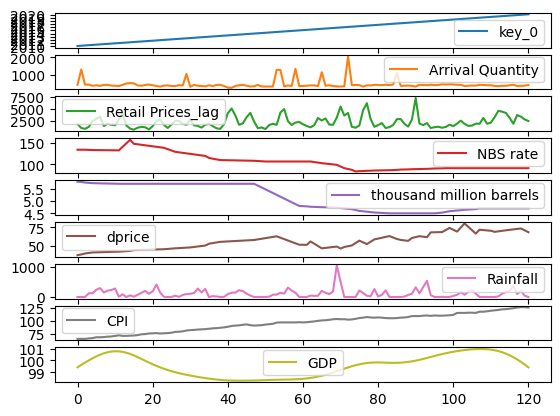

In [ ]:
finaldf.plot(subplots=True)

In [ ]:
finaldf['ds'] = finaldf['key_0']
finaldf.drop('key_0',axis=1,inplace=True)
finaldf
finaldf.rename(columns={'Retail Prices_lag':'y'},inplace=True)
finaldf.tail()

Arrival Quantity            y  NBS rate  thousand million barrels  \
116        444.000000  1870.537634    90.651                       4.7   
117        376.666667  3694.623656    90.651                       4.7   
118        382.500000  3356.559140    90.651                       4.7   
119        395.000000  2777.580645    90.651                       4.7   
120        426.000000  2435.806452    90.651                       4.7   

        dprice  Rainfall         CPI        GDP         ds  
116  72.084593     369.7  124.322601  100.27402 2019-10-01  
117  72.688823      97.8  125.470194  100.08812 2019-11-01  
118  73.293052     208.6  126.235257   99.88208 2019-12-01  
119  70.775428      44.9  126.235257   99.65701 2020-01-01  
120  68.257804       0.2  125.470194   99.41502 2020-02-01

In [ ]:
finaldf['ds']

0     2010-02-01
1     2010-03-01
2     2010-04-01
3     2010-05-01
4     2010-06-01
         ...    
116   2019-10-01
117   2019-11-01
118   2019-12-01
119   2020-01-01
120   2020-02-01
Name: ds, Length: 121, dtype: datetime64[ns]

In [ ]:
finaldf.isnull().sum()

Arrival Quantity            0
y                           0
NBS rate                    0
thousand million barrels    0
dprice                      0
Rainfall                    0
CPI                         0
GDP                         0
ds                          0
dtype: int64

In [ ]:
finaldf1.corr()

<ipython-input-48-29b5b127a9ac>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Arrival Quantity_mean         y  NBS rate  \
Arrival Quantity_mean                  1.000000 -0.421164 -0.097530   
y                                     -0.421164  1.000000 -0.246622   
NBS rate                              -0.097530 -0.246622  1.000000   
thousand million barrels              -0.251469 -0.174740  0.879957   
dprice                                 0.081072  0.105723 -0.772009   
Rainfall                              -0.176395  0.209742  0.014919   
CPI                                    0.108730  0.257919 -0.914394   
GDP                                    0.325723 -0.015949 -0.112067   

                          thousand million barrels    dprice  Rainfall  \
Arrival Quantity_mean                    -0.251469  0.081072 -0.176395   
y                                        -0.174740  0.105723  0.209742   
NBS rate                                  0.879957 -0.772009  0.014919   
thousand million barrels                  1.000000 -0.662976 -0.029733   
dprice                                   -0.662976  1.000000 -0.100642   
Rainfall                                 -0.029733 -0.100642  1.000000   
CPI                                      -0.876004  0.882458  0.010321   
GDP                                      -0.350515  0.285411  0.015352   

                               CPI       GDP  
Arrival Quantity_mean     0.108730  0.325723  
y                         0.257919 -0.015949  
NBS rate                 -0.914394 -0.112067  
thousand million barrels -0.876004 -0.350515  
dprice                    0.882458  0.285411  
Rainfall                  0.010321  0.015352  
CPI                       1.000000  0.246885  
GDP                       0.246885  1.000000

In [ ]:
finaldf.corr()

<ipython-input-49-fbcde4b1202f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Arrival Quantity         y  NBS rate  \
Arrival Quantity                  1.000000  0.015127 -0.010725   
y                                 0.015127  1.000000 -0.246622   
NBS rate                         -0.010725 -0.246622  1.000000   
thousand million barrels         -0.047379 -0.174740  0.879957   
dprice                           -0.090928  0.105723 -0.772009   
Rainfall                         -0.091284  0.209742  0.014919   
CPI                              -0.035325  0.257919 -0.914394   
GDP                              -0.089062 -0.015949 -0.112067   

                          thousand million barrels    dprice  Rainfall  \
Arrival Quantity                         -0.047379 -0.090928 -0.091284   
y                                        -0.174740  0.105723  0.209742   
NBS rate                                  0.879957 -0.772009  0.014919   
thousand million barrels                  1.000000 -0.662976 -0.029733   
dprice                                   -0.662976  1.000000 -0.100642   
Rainfall                                 -0.029733 -0.100642  1.000000   
CPI                                      -0.876004  0.882458  0.010321   
GDP                                      -0.350515  0.285411  0.015352   

                               CPI       GDP  
Arrival Quantity         -0.035325 -0.089062  
y                         0.257919 -0.015949  
NBS rate                 -0.914394 -0.112067  
thousand million barrels -0.876004 -0.350515  
dprice                    0.882458  0.285411  
Rainfall                  0.010321  0.015352  
CPI                       1.000000  0.246885  
GDP                       0.246885  1.000000

In [ ]:
#finaldf=finaldf1

In [ ]:
import numpy as np
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, r2_score,mean_absolute_percentage_error
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation

#from sklearn.linear_model import LinearRegression

import plotly.graph_objs as go
from plotly.subplots import make_subplots


import itertools

In [ ]:
# splitting train and test data
trainDataSize = 0.80
splitSize = int(finaldf.shape[0]*trainDataSize)
print(splitSize)
train = finaldf[0:splitSize]
test = finaldf[splitSize:]
print(train.shape)
print(test.shape)

prophetColumns =['Arrival Quantity','CPI','GDP','NBS rate','thousand million barrels']
# model

model = Prophet()

# adding all columns in add regressor
for col in prophetColumns:
    model.add_regressor(col)
#training model
model.fit(train)

future =test.copy()
future.drop('y',axis=1,inplace=True)

#prediction
prediction = model.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dp7b7zi/lkw8hqi2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dp7b7zi/hxlfscad.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1113', 'data', 'file=/tmp/tmp6dp7b7zi/lkw8hqi2.json', 'init=/tmp/tmp6dp7b7zi/hxlfscad.json', 'output', 'file=/tmp/tmp6dp7b7zi/prophet_modell1jjs2k8/prophet_model-20230710105248.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:52:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


96
(96, 9)
(25, 9)


10:52:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 558.885
MAPE: 0.2690558650349752


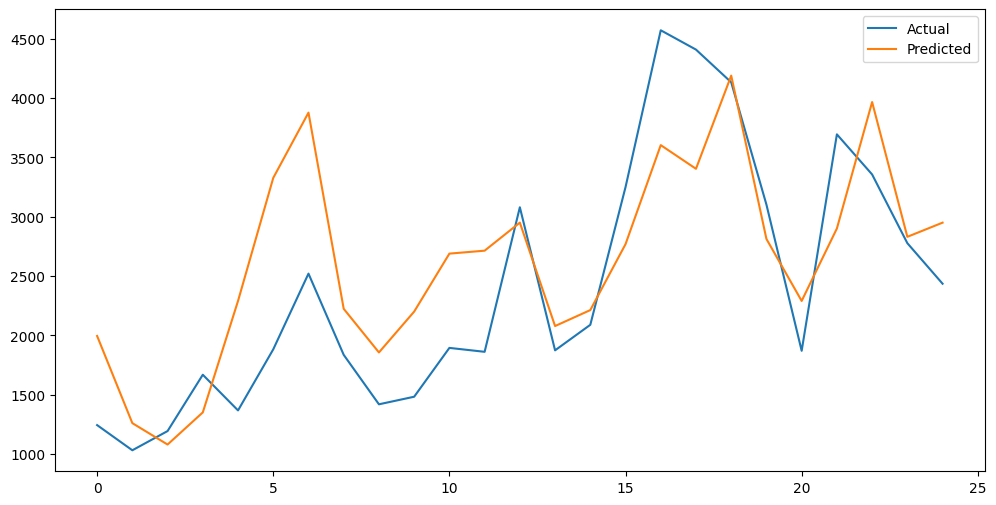

In [ ]:
y_true = test['y'].values
y_pred = prediction['yhat'].values


plt.figure(figsize=(12, 6))
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
mape = mean_absolute_percentage_error(y_true, y_pred)
print("MAPE:", mape)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=test['ds'].values, y=y_true, name="actual targets"),)
    #secondary_y=False,)
fig.add_trace(
    go.Scatter(x=test['ds'].values, y=y_pred, name="predicted targets"),)
    #secondary_y=True,)
fig.add_trace(go.Scatter(x=finaldf['ds'].values, y=finaldf['y'].values, name="original data"),)
    #secondary_y=True,)
fig.update_layout(
    title_text="Actual vs Predicted Targets")
fig.update_xaxes(title_text="Timeline")
fig.update_yaxes(title_text="actual targets", secondary_y=False)
fig.update_yaxes(title_text="predicted targets", secondary_y=True)
fig.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dp7b7zi/y_lfhpew.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dp7b7zi/ppougcpe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60420', 'data', 'file=/tmp/tmp6dp7b7zi/y_lfhpew.json', 'init=/tmp/tmp6dp7b7zi/ppougcpe.json', 'output', 'file=/tmp/tmp6dp7b7zi/prophet_modelic35_7nu/prophet_model-20230710105248.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:52:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


96
(96, 9)
(25, 9)


10:52:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 1032.530
MAPE: 0.4879247131016197


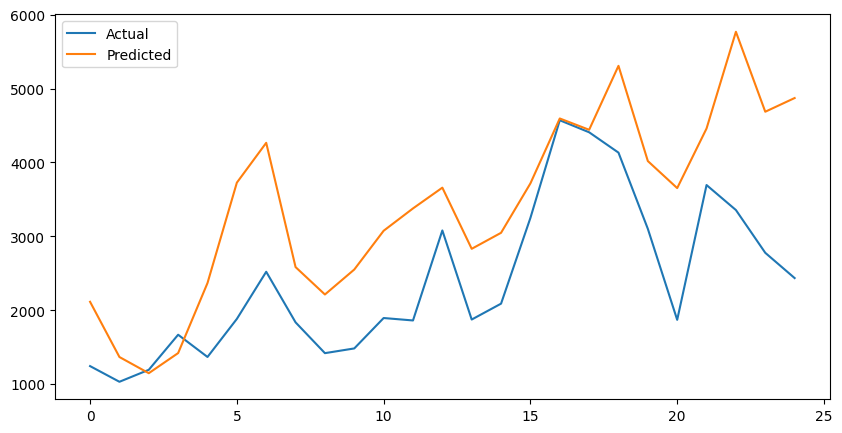

In [ ]:
#Trial 2

# splitting train and test data
trainDataSize = 0.80
splitSize = int(finaldf.shape[0]*trainDataSize)
print(splitSize)
train = finaldf[0:splitSize]
test = finaldf[splitSize:]
print(train.shape)
print(test.shape)
prophetColumns =['Arrival Quantity','CPI','GDP','NBS rate']
# model

#seasonality_mode = 'multiplicative'

#modelWeekly = Prophet(changepoint_range=0.90,changepoint_prior_scale = 0.5)

model = Prophet(changepoint_range=0.95,changepoint_prior_scale = 1,)#seasonality_prior_scale=20)

# adding all columns in add regressor
for col in prophetColumns:
    model.add_regressor(col)
#training model
model.fit(train)

future =test.copy()
future.drop('y',axis=1,inplace=True)

#prediction
prediction = model.predict(future)

y_true = test['y'].values
y_pred = prediction['yhat'].values


plt.figure(figsize=(10, 5))
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
mape = mean_absolute_percentage_error(y_true, y_pred)
print("MAPE:", mape)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# with extreme weather and 80% train data, seasonality mode mulitplicative
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=test['ds'].values, y=y_true, name="actual targets"),)
    #secondary_y=False,)
fig.add_trace(
    go.Scatter(x=test['ds'].values, y=y_pred, name="predicted targets"),)
    #secondary_y=True,)
fig.add_trace(go.Scatter(x=finaldf['ds'].values, y=finaldf['y'].values, name="original data"),)
    #secondary_y=True,)
fig.update_layout(
    title_text="Actual vs Predicted Targets")
fig.update_xaxes(title_text="Timeline")
fig.update_yaxes(title_text="actual targets", secondary_y=False)
fig.update_yaxes(title_text="predicted targets", secondary_y=True)
fig.show()

In [ ]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 120
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Arrival Quantity          121 non-null    float64       
 1   y                         121 non-null    float64       
 2   NBS rate                  121 non-null    float64       
 3   thousand million barrels  121 non-null    float64       
 4   dprice                    121 non-null    float64       
 5   Rainfall                  121 non-null    float64       
 6   CPI                       121 non-null    float64       
 7   GDP                       121 non-null    float64       
 8   ds                        121 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(8)
memory usage: 9.5 KB


In [ ]:
def model_prophet(Prophetdf,n_obs= 115):

    Prophetdf_train=Prophetdf[0:n_obs]
    Prophetdf_test =Prophetdf[n_obs:]
    multi_model = Prophet(interval_width = 0.95)
    Prophet_cols = Prophetdf.columns.tolist()
    Prophet_cols.remove('ds')
    Prophet_cols.remove('y')
    print(Prophetdf_train.columns)
    #print(Prophetdf_test[['ds','y']])

    # adding all columns in add regressor
    for col in Prophet_cols:
        multi_model.add_regressor(col)


    multi_model.fit(Prophetdf_train)
    print('Prophetdf_test.shape[0]')
    print(Prophetdf_test.shape[0])
    # make furture frame
    future = multi_model.make_future_dataframe(periods = Prophetdf_test.shape[0],freq='MS', include_history=True)
    for col in Prophet_cols:
        future[col] =Prophetdf[col]
    print(Prophetdf_test[['ds','y']])
    print('future')
    print(future)

    # predict future
    forecastProphet =  multi_model.predict(future)
    combined_df = pd.merge(Prophetdf_test[['ds','y']],forecastProphet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

    print(forecastProphet[['ds','yhat', 'yhat_lower','yhat_upper']].tail())

    fig1 = multi_model.plot(forecastProphet)

    Prophetdf.plot(x = 'ds', y = 'y')

    multi_model.plot_components(forecastProphet);


    #print(Prophetdf_test[['ds','y']])
    print(forecastProphet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-6:])

    combined_df = pd.merge(Prophetdf_test[['ds','y']],forecastProphet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-6:], on='ds')
    #print(combined_df.head())


    #Check MAE value
    MAE = mean_absolute_error(combined_df['y'], combined_df['yhat'])
    print('MAE')
    print(MAE)

#Check MAPE value
    MAPE = mean_absolute_percentage_error(combined_df['y'], combined_df['yhat'])
    print('MAPE')
    print(MAPE)

    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.rcParams.update({'figure.figsize':  (15, 3),  'figure.dpi' : 300})
    fig, ax = plt.subplots()

    sns.lineplot(data = Prophetdf , x = 'ds', y = 'y' ,label = 'Original')
    sns.lineplot(data= forecastProphet, x = 'ds', y = 'yhat', label = 'Forecast')
    plt.grid(linestyle = '-', linewidth = 0.3)

    plt.legend(["Original","forecast"])


    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.rcParams.update({'figure.figsize':  (15, 3),  'figure.dpi' : 300})
    fig, ax = plt.subplots()
    sns.lineplot(data = Prophetdf[-6:] , x = 'ds', y = 'y' ,label = 'Original')
    sns.lineplot(data= forecastProphet[-6:], x = 'ds', y = 'yhat', label = 'Forecast')
    plt.grid(linestyle = '-', linewidth = 0.3)
    plt.legend(["Original","forecast"])




    return MAE

In [ ]:
finaldf.head()

Arrival Quantity            y  NBS rate  thousand million barrels  \
0        442.000000  1807.283951  133.5820                    5.7875   
1       1312.500000   967.419355  133.5820                    5.7750   
2        447.500000   797.956989  133.5820                    5.7500   
3        456.666667  1211.827957  133.2125                    5.7375   
4        383.333333  2424.892473  132.8430                    5.7250   

      dprice  Rainfall        CPI        GDP         ds  
0  37.133685       0.1  65.030284   99.41989 2010-02-01  
1  38.096676       0.0  65.030284   99.62147 2010-03-01  
2  39.456193       0.0  65.030284   99.81792 2010-04-01  
3  40.135951     123.5  65.795346  100.00665 2010-05-01  
4  40.815709     123.3  66.560408  100.18442 2010-06-01

In [ ]:
finaldf1.head()

Arrival Quantity_mean            y  NBS rate  thousand million barrels  \
0           10271.666667  1807.283951  133.5820                    5.7875   
1           17327.000000   967.419355  133.5820                    5.7750   
2           12711.500000   797.956989  133.5820                    5.7500   
3           11286.000000  1211.827957  133.2125                    5.7375   
4            9513.166667  2424.892473  132.8430                    5.7250   

      dprice  Rainfall        CPI        GDP         ds  
0  37.133685       0.1  65.030284   99.41989 2010-02-01  
1  38.096676       0.0  65.030284   99.62147 2010-03-01  
2  39.456193       0.0  65.030284   99.81792 2010-04-01  
3  40.135951     123.5  65.795346  100.00665 2010-05-01  
4  40.815709     123.3  66.560408  100.18442 2010-06-01

In [ ]:
finaldf1.iplot()

In [ ]:
#HERE we can see that MAE for arrival quantity mean(589.63) resampling is significantly less than that calculated using max resampling(608.94)

In [ ]:
finaldf.drop(['thousand million barrels'],axis=1,inplace=True)
finaldf.columns

Index(['Arrival Quantity', 'y', 'NBS rate', 'dprice', 'Rainfall', 'CPI', 'GDP',
       'ds'],
      dtype='object')

In [ ]:
finaldf1.drop(['thousand million barrels'],axis=1,inplace=True)
finaldf1.columns

Index(['Arrival Quantity_mean', 'y', 'NBS rate', 'dprice', 'Rainfall', 'CPI',
       'GDP', 'ds'],
      dtype='object')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dp7b7zi/if4v7hnm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dp7b7zi/zw4rl5sv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10053', 'data', 'file=/tmp/tmp6dp7b7zi/if4v7hnm.json', 'init=/tmp/tmp6dp7b7zi/zw4rl5sv.json', 'output', 'file=/tmp/tmp6dp7b7zi/prophet_model9oddw7x9/prophet_model-20230710105249.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:52:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Index(['Arrival Quantity', 'y', 'NBS rate', 'dprice', 'Rainfall', 'CPI', 'GDP',
       'ds'],
      dtype='object')


10:52:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophetdf_test.shape[0]
6
            ds            y
115 2019-09-01  3102.311828
116 2019-10-01  1870.537634
117 2019-11-01  3694.623656
118 2019-12-01  3356.559140
119 2020-01-01  2777.580645
120 2020-02-01  2435.806452
future
            ds  Arrival Quantity  NBS rate     dprice  Rainfall         CPI  \
0   2010-02-01        442.000000  133.5820  37.133685       0.1   65.030284   
1   2010-03-01       1312.500000  133.5820  38.096676       0.0   65.030284   
2   2010-04-01        447.500000  133.5820  39.456193       0.0   65.030284   
3   2010-05-01        456.666667  133.2125  40.135951     123.5   65.795346   
4   2010-06-01        383.333333  132.8430  40.815709     123.3   66.560408   
..         ...               ...       ...        ...       ...         ...   
116 2019-10-01        444.000000   90.6510  72.084593     369.7  124.322601   
117 2019-11-01        376.666667   90.6510  72.688823      97.8  125.470194   
118 2019-12-01        382.500000   90.6510  73.293052     20

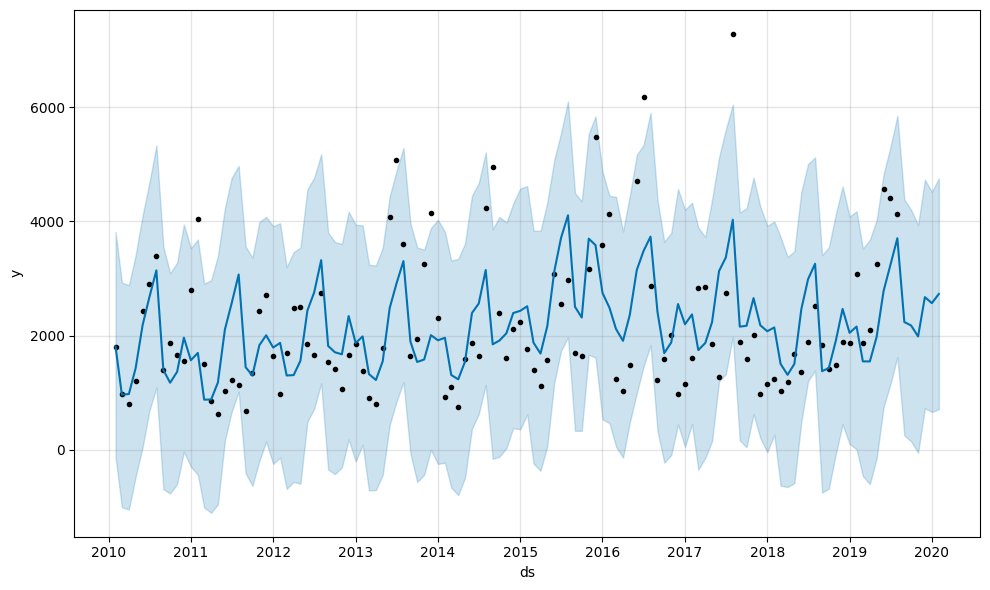

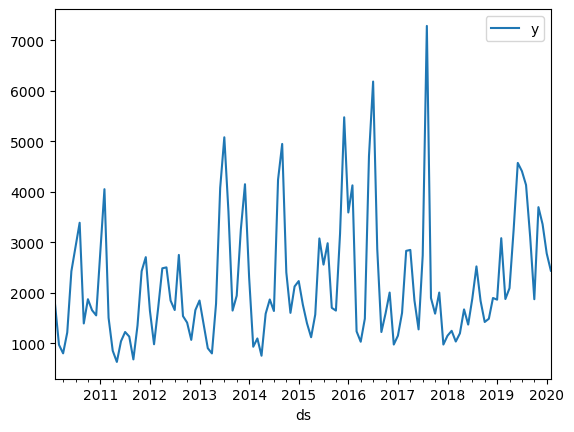

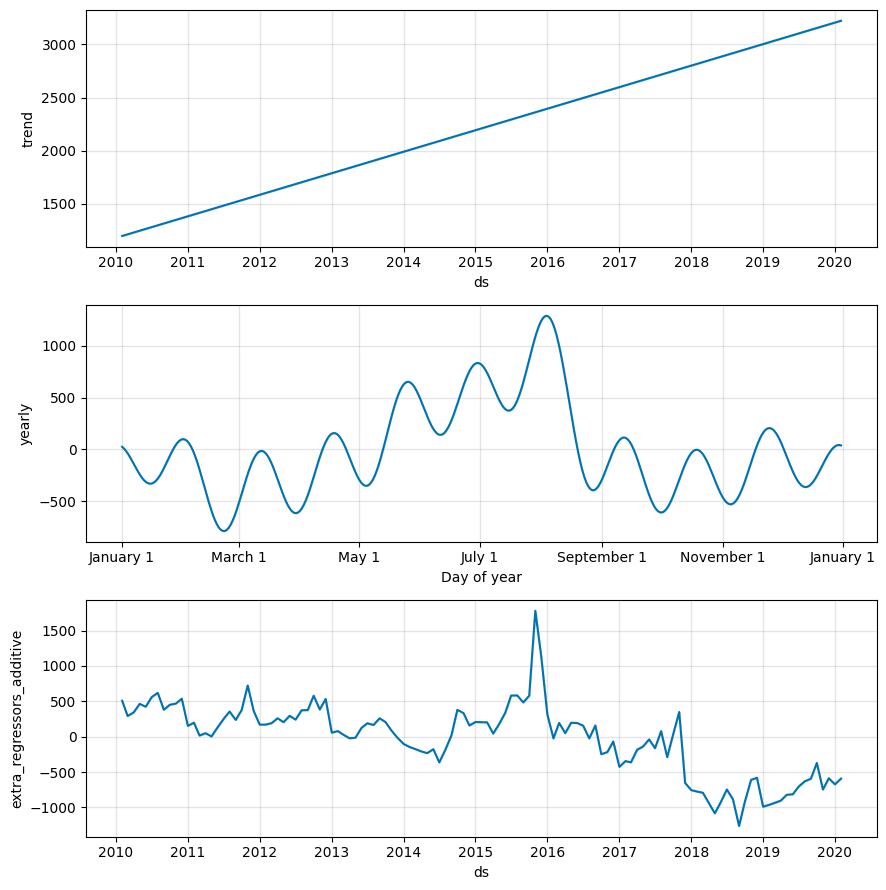

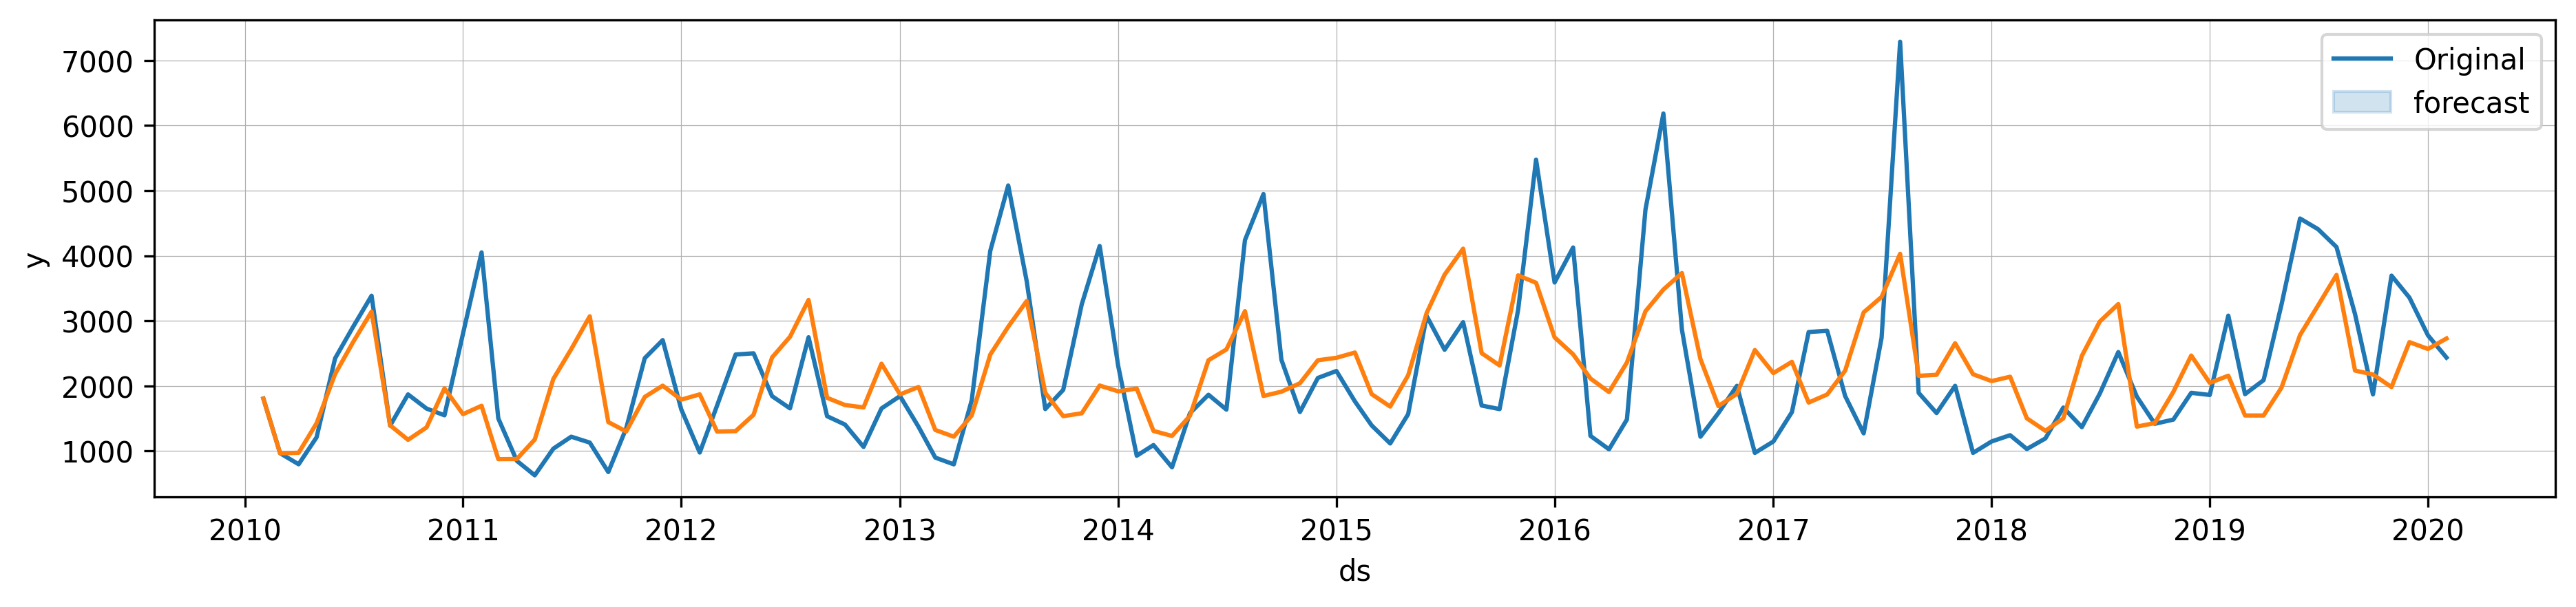

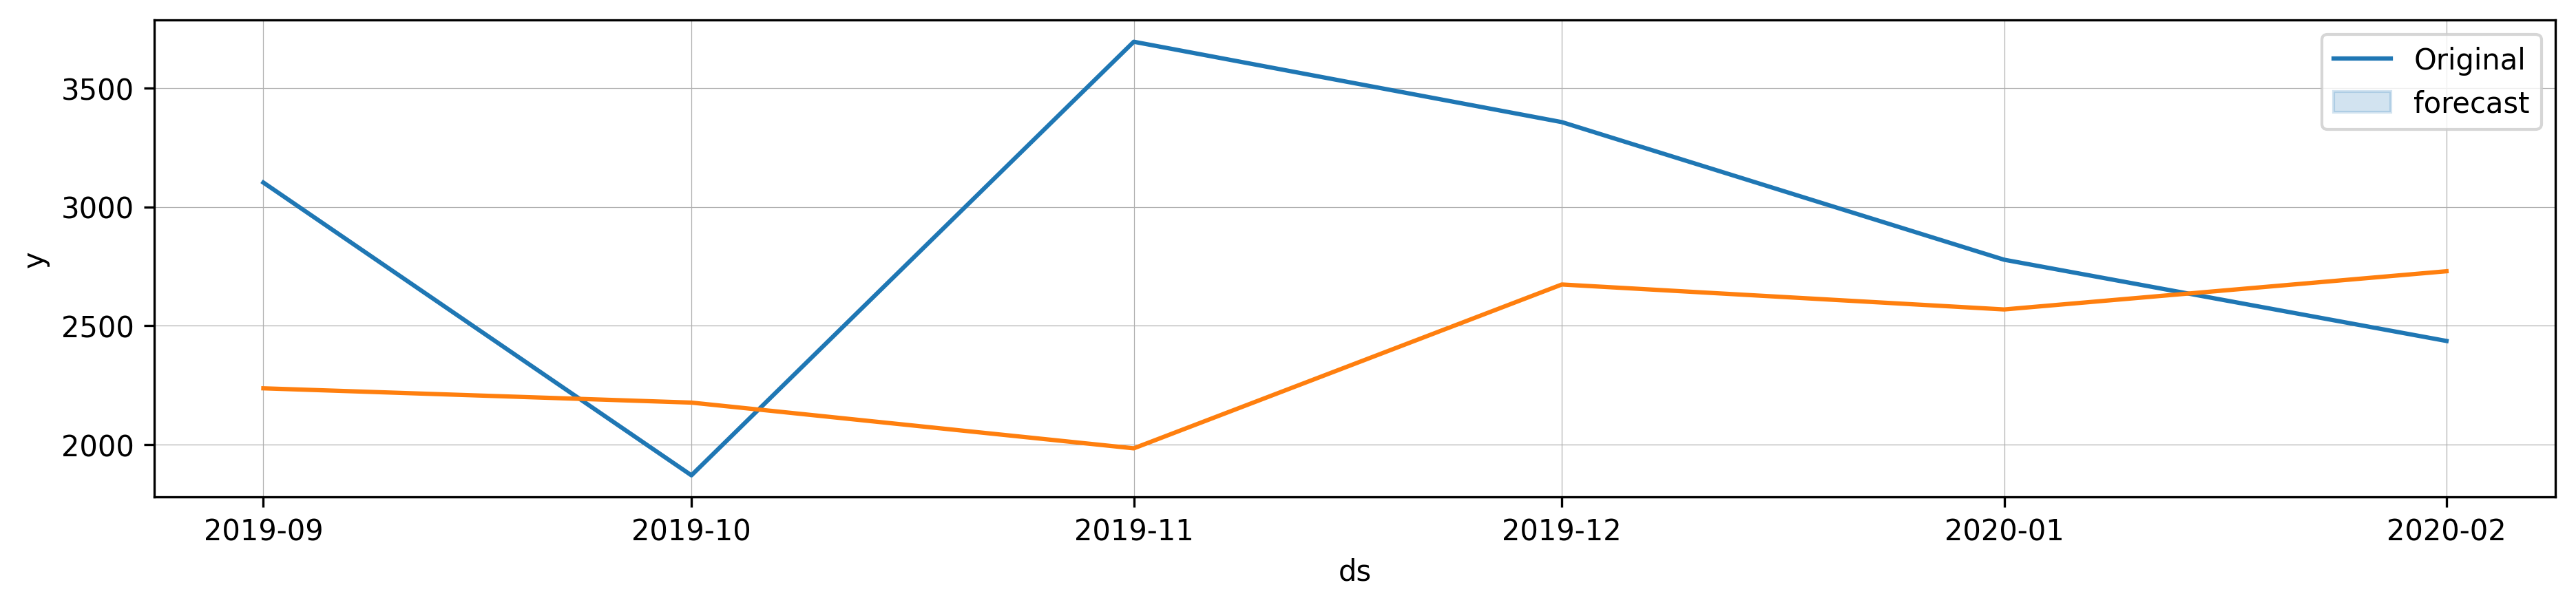

In [ ]:
MAE_Prophet = model_prophet(finaldf)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dp7b7zi/916m62q1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dp7b7zi/x5afgve_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57345', 'data', 'file=/tmp/tmp6dp7b7zi/916m62q1.json', 'init=/tmp/tmp6dp7b7zi/x5afgve_.json', 'output', 'file=/tmp/tmp6dp7b7zi/prophet_modelunncmqds/prophet_model-20230710105253.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:52:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:52:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Index(['Arrival Quantity_mean', 'y', 'NBS rate', 'dprice', 'Rainfall', 'CPI',
       'GDP', 'ds'],
      dtype='object')
Prophetdf_test.shape[0]
6
            ds            y
115 2019-09-01  3102.311828
116 2019-10-01  1870.537634
117 2019-11-01  3694.623656
118 2019-12-01  3356.559140
119 2020-01-01  2777.580645
120 2020-02-01  2435.806452
future
            ds  Arrival Quantity_mean  NBS rate     dprice  Rainfall  \
0   2010-02-01           10271.666667  133.5820  37.133685       0.1   
1   2010-03-01           17327.000000  133.5820  38.096676       0.0   
2   2010-04-01           12711.500000  133.5820  39.456193       0.0   
3   2010-05-01           11286.000000  133.2125  40.135951     123.5   
4   2010-06-01            9513.166667  132.8430  40.815709     123.3   
..         ...                    ...       ...        ...       ...   
116 2019-10-01           12849.833333   90.6510  72.084593     369.7   
117 2019-11-01           11244.000000   90.6510  72.688823      97.8   
11

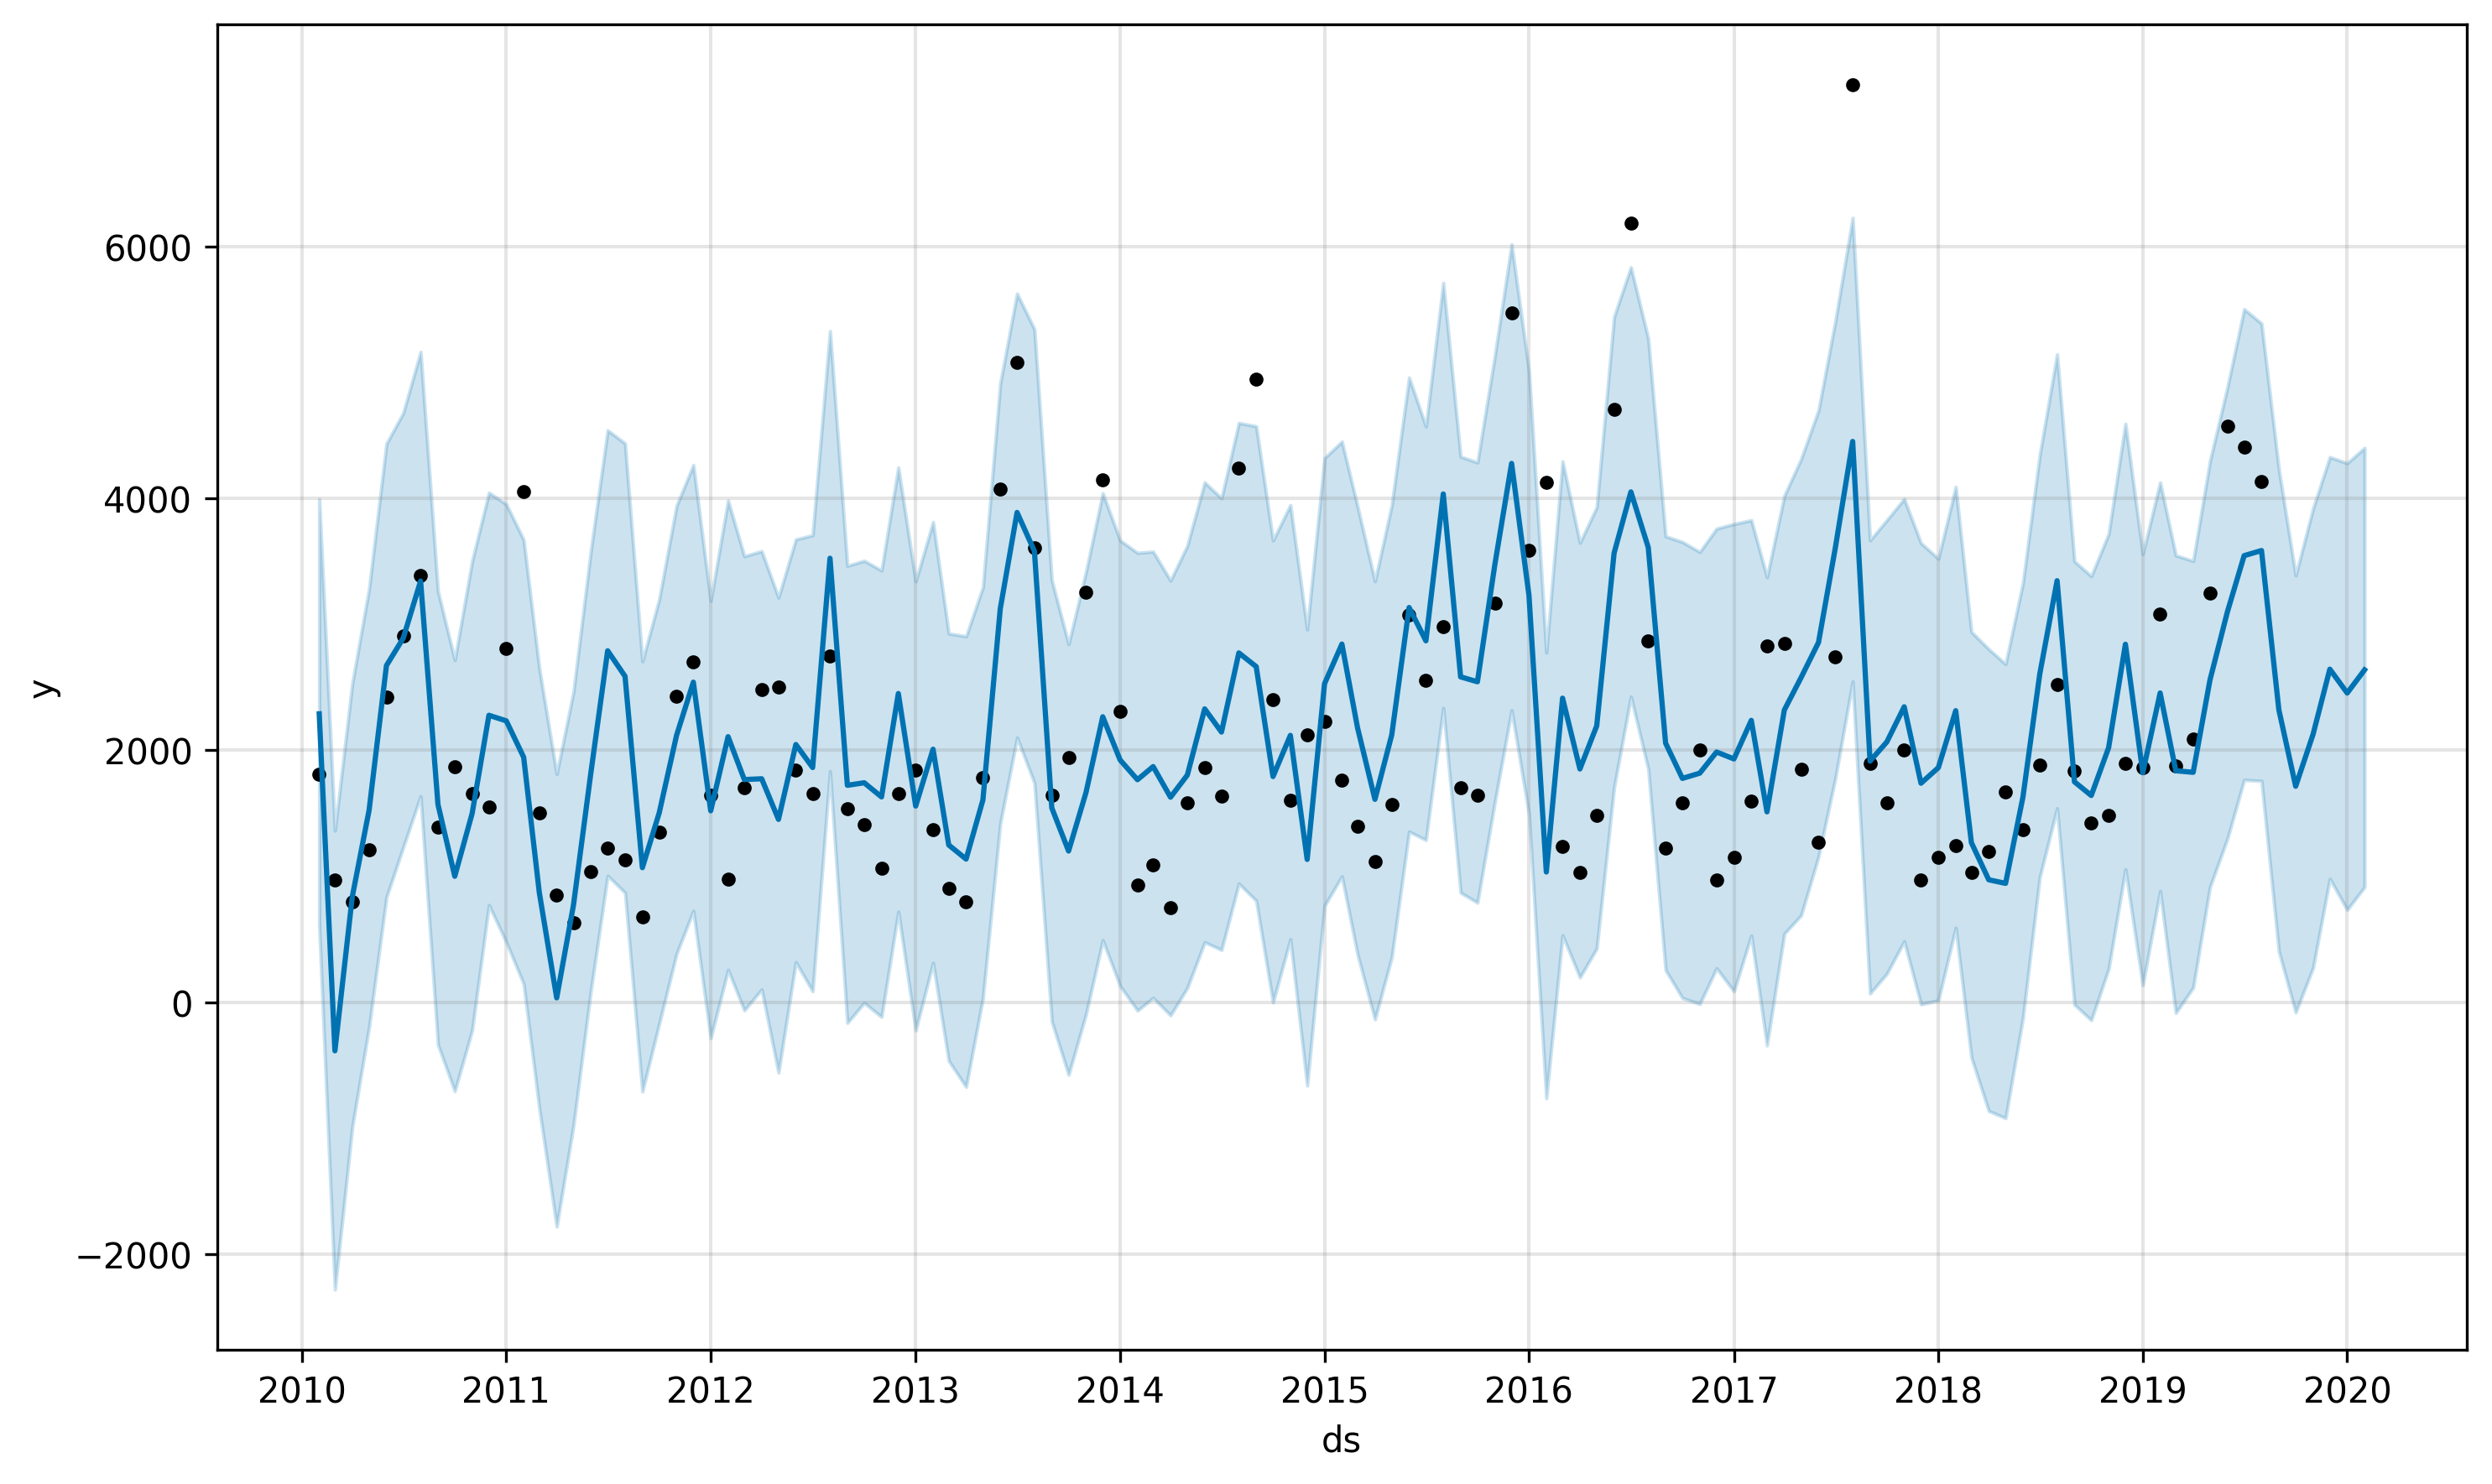

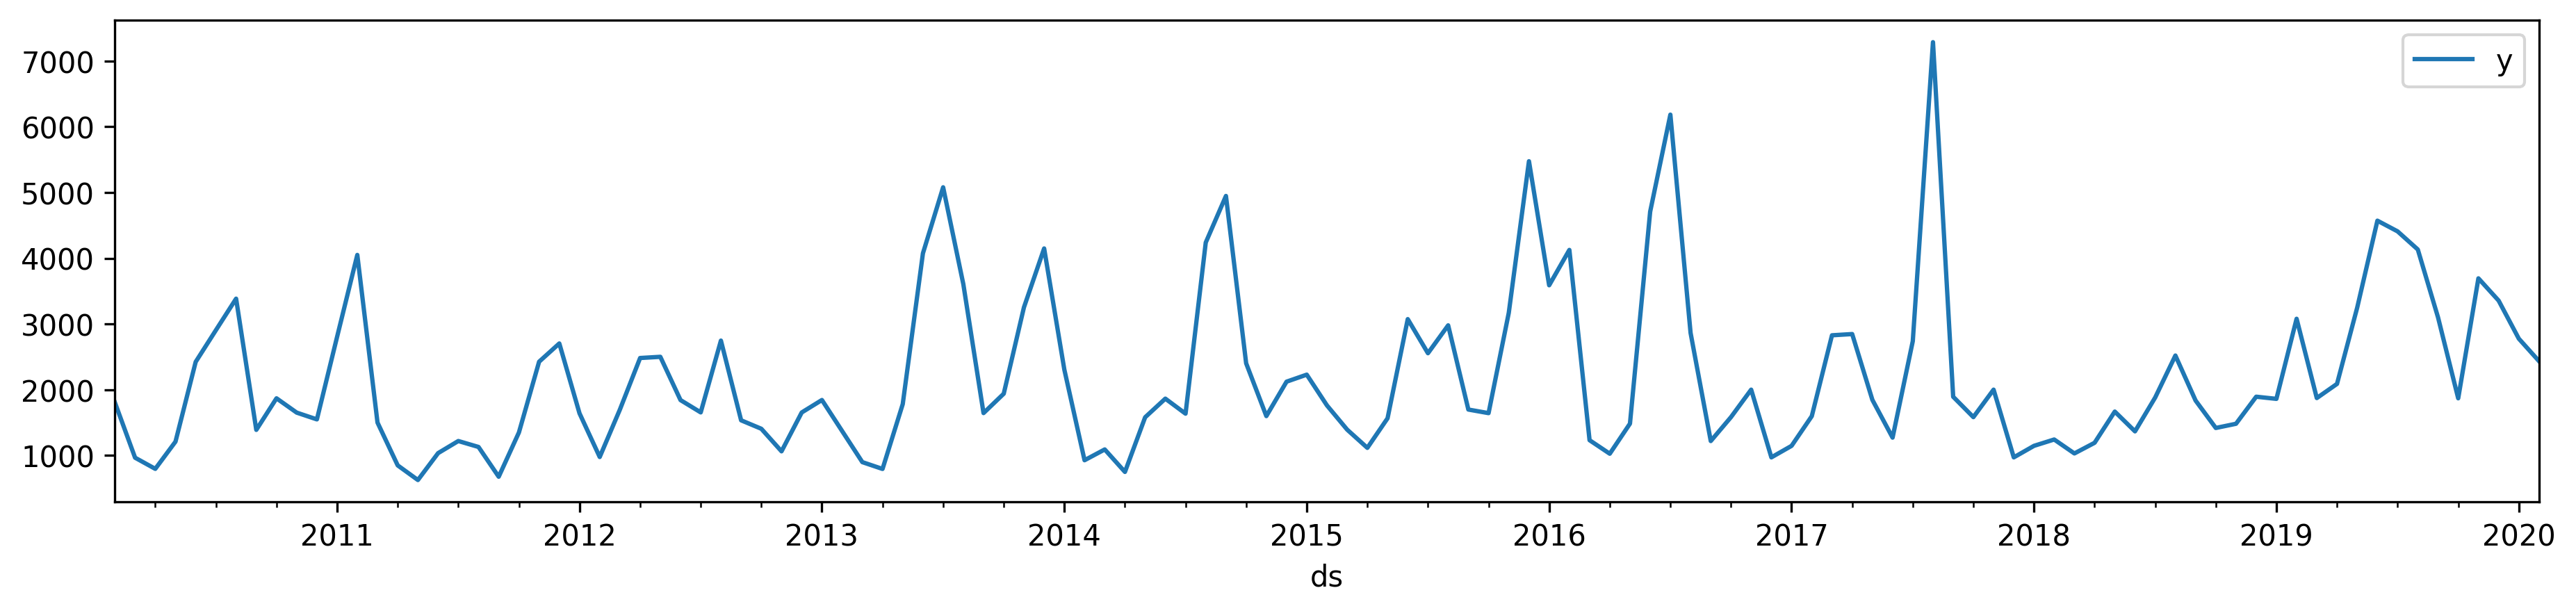

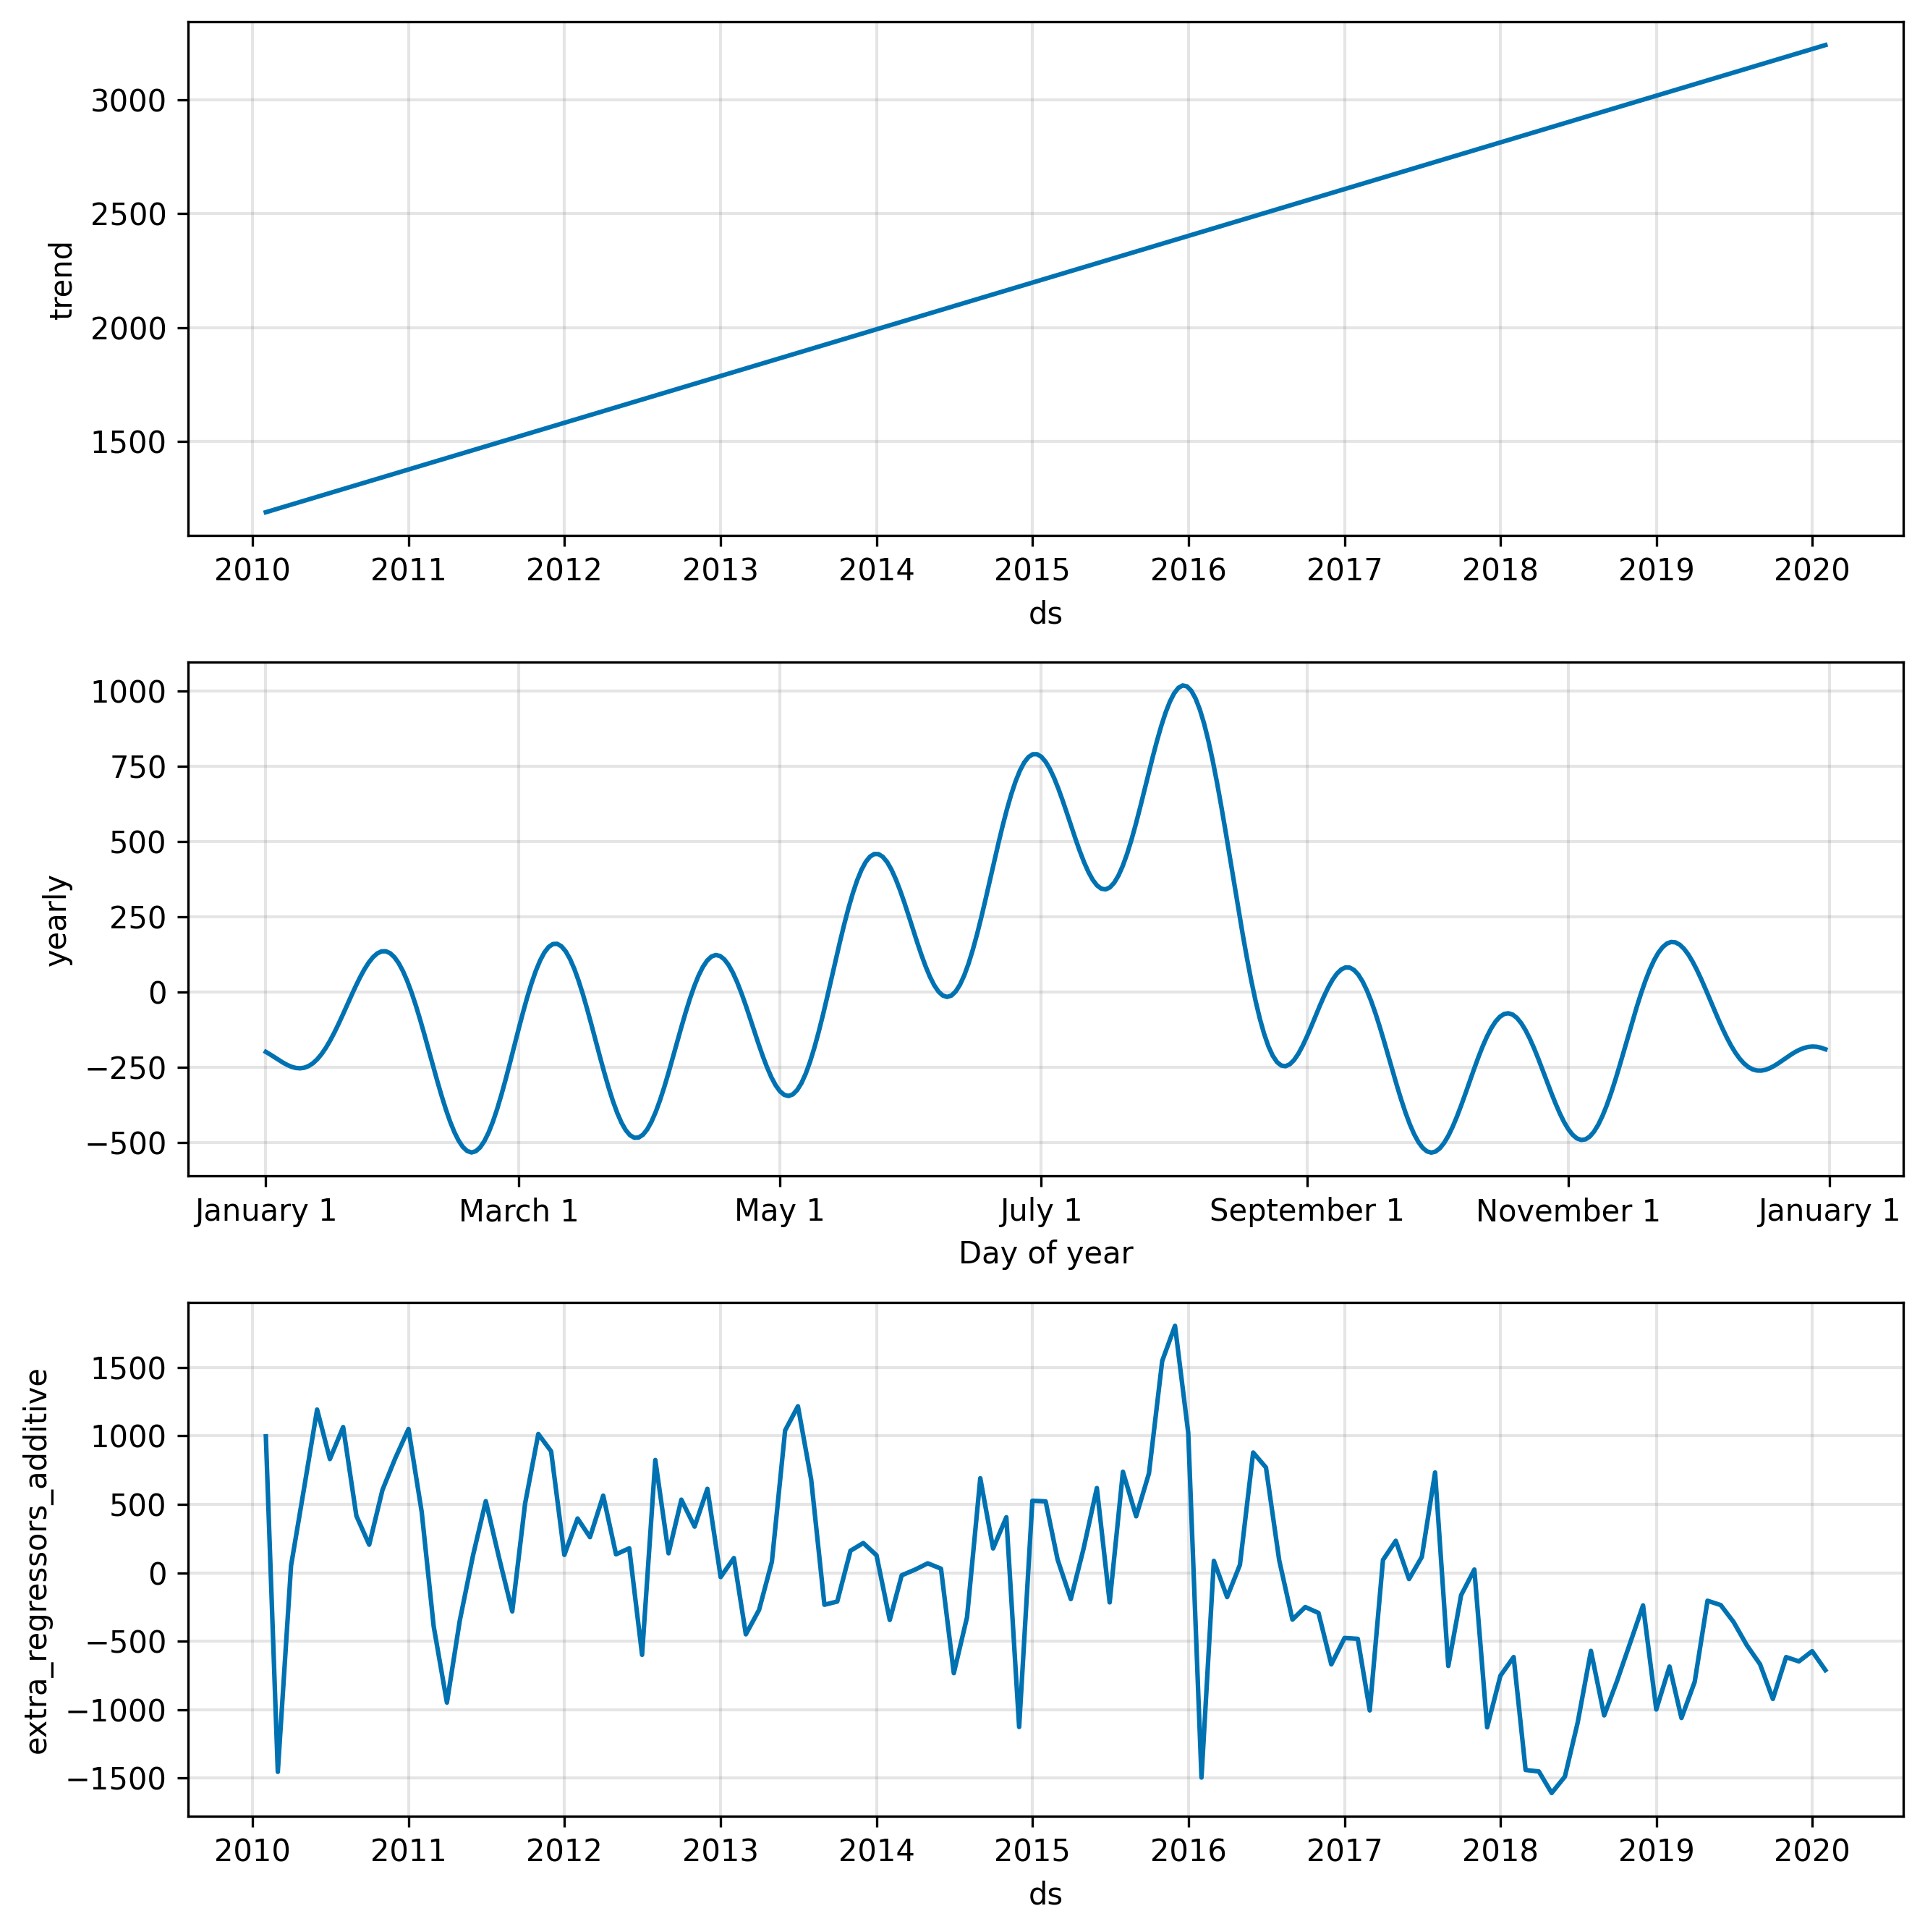

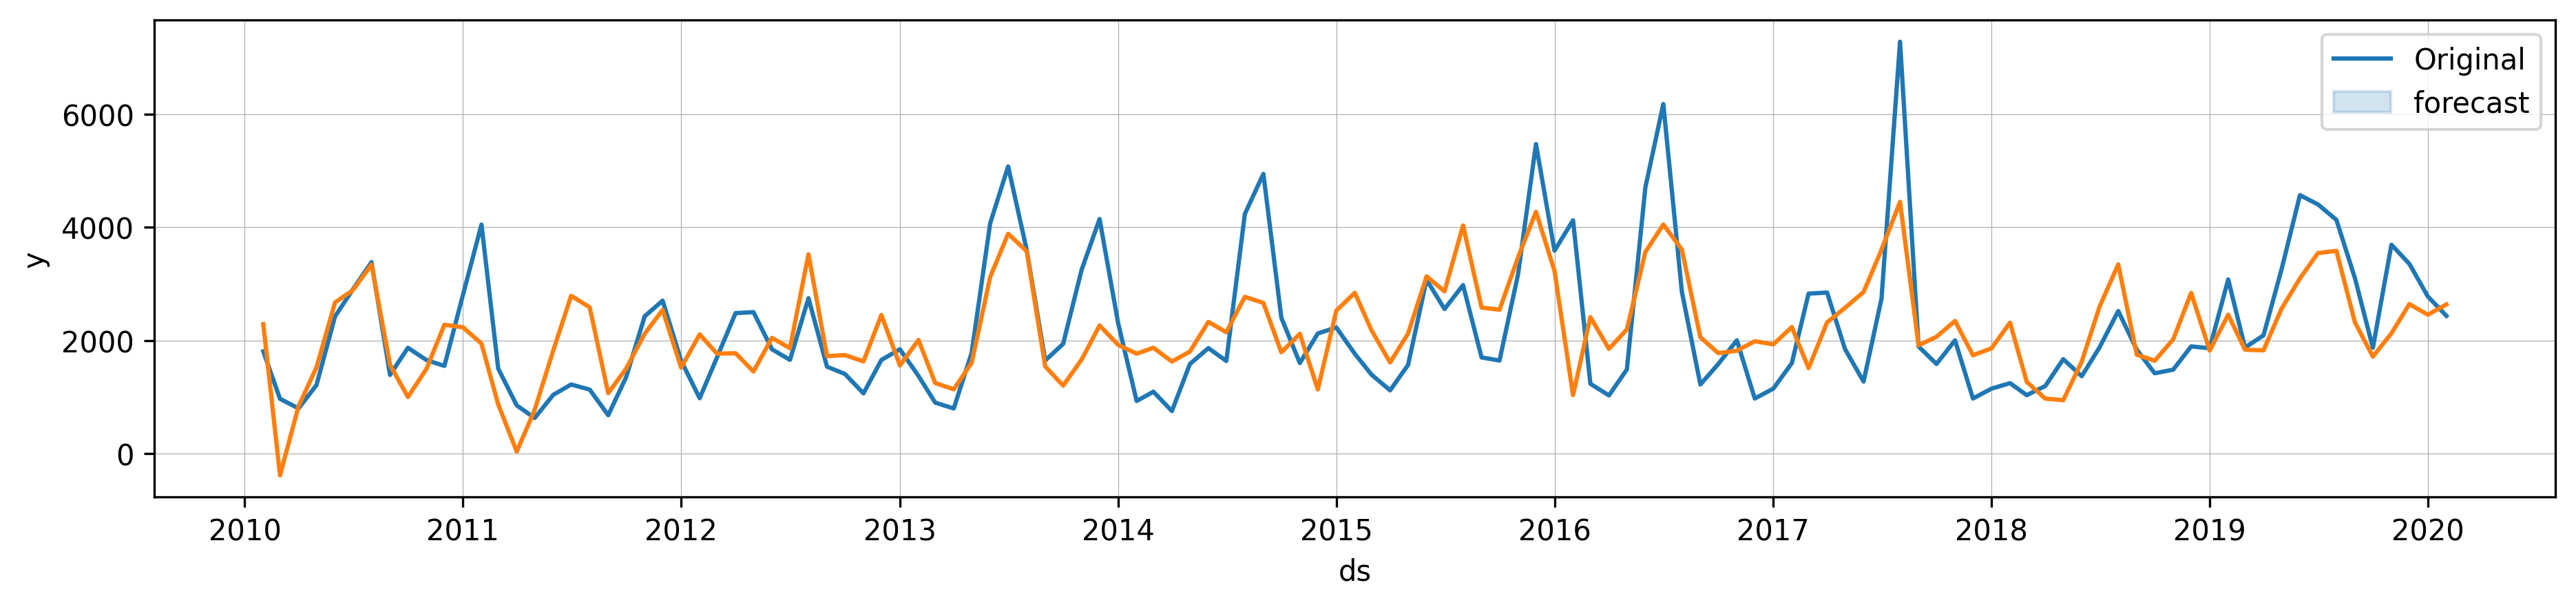

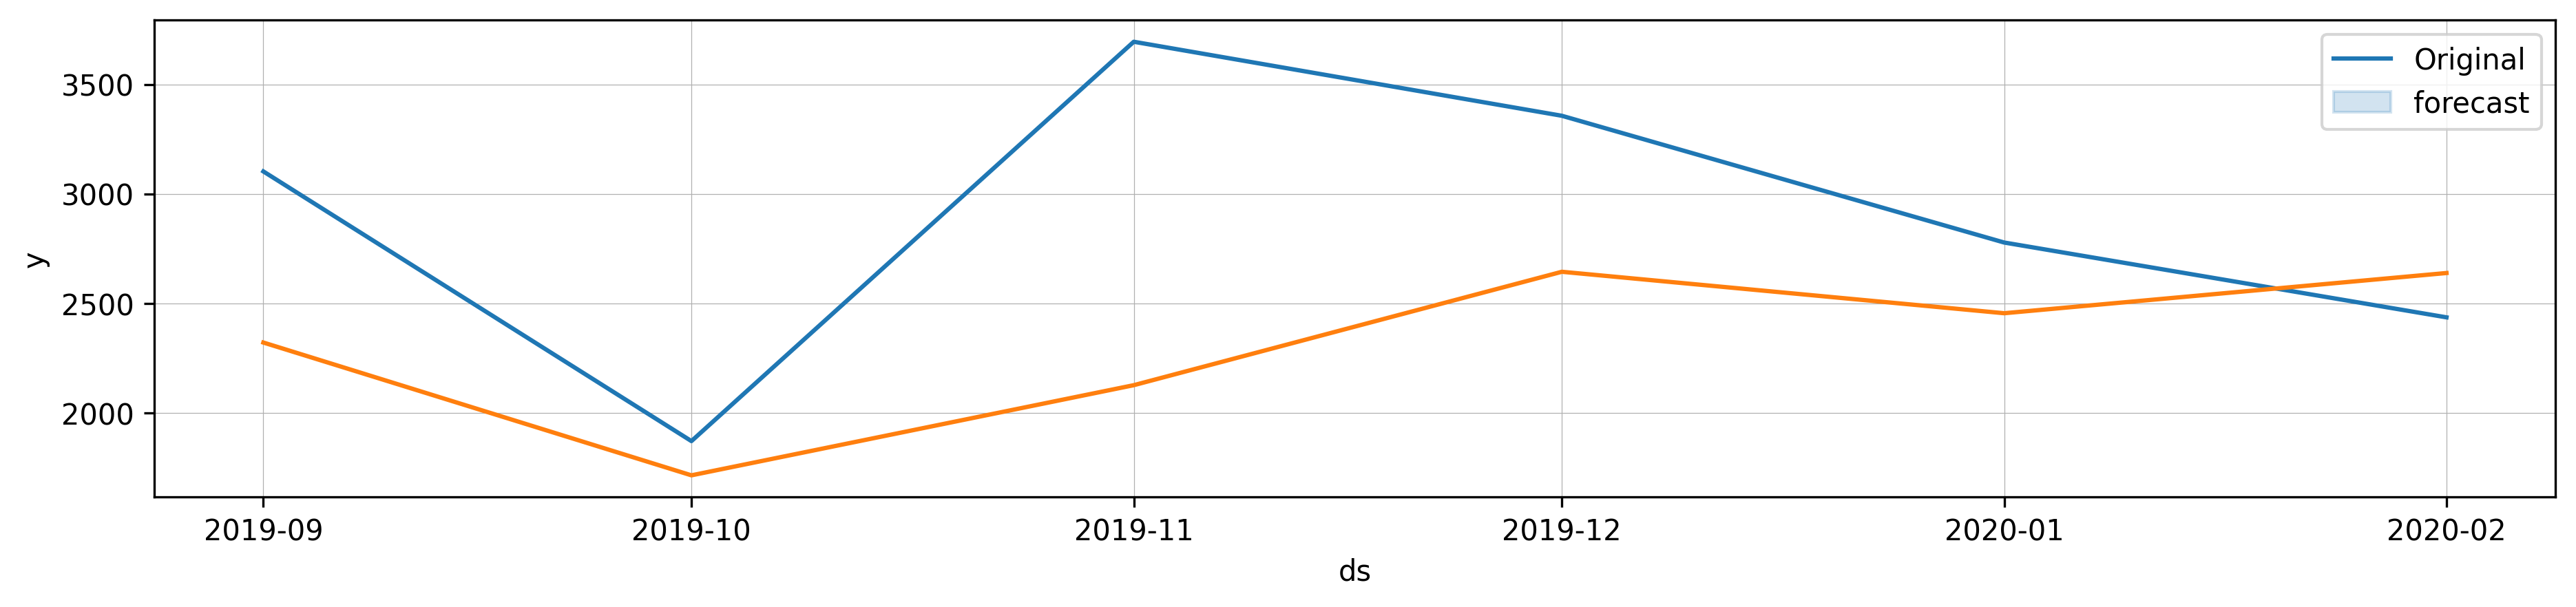

In [ ]:
MAE_Prophet_1=model_prophet(finaldf1)
